##  Prophet_Model.ipynb
#### ----------------------------------------
#### This notebook trains and evaluates the Facebook Prophet model.
#### It is used for additive time series forecasting with trend,
#### seasonality, and holiday components.
#### ----------------------------------------

In [7]:
# Required Libraries
import pandas as pd
from prophet import Prophet
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error

In [3]:
# Load data
df = pd.read_csv("R:/Projects/1_Data_Science & ML_Projects/04_Sales and Demand Forecasting for Retail Chains or Predictive Sales/02_Data/2_Processed_dataset/train_data.csv", parse_dates=["Date"])
test = pd.read_csv("R:/Projects/1_Data_Science & ML_Projects/04_Sales and Demand Forecasting for Retail Chains or Predictive Sales/02_Data/2_Processed_dataset/test_data.csv", parse_dates=["Date"])

In [5]:
# Filter and prepare
store_id = 1
train_df = df[df["Store"] == store_id][["Date", "Weekly_Sales"]].rename(columns={"Date": "ds", "Weekly_Sales": "y"})
test_df = test[test["Store"] == store_id][["Date", "Weekly_Sales"]].rename(columns={"Date": "ds", "Weekly_Sales": "y"})

In [9]:
# Train Prophet
model = Prophet()
model.fit(train_df)

10:30:08 - cmdstanpy - INFO - Chain [1] start processing
10:30:08 - cmdstanpy - INFO - Chain [1] done processing


In [11]:
# Forecast
future = test_df[["ds"]]
forecast = model.predict(future)

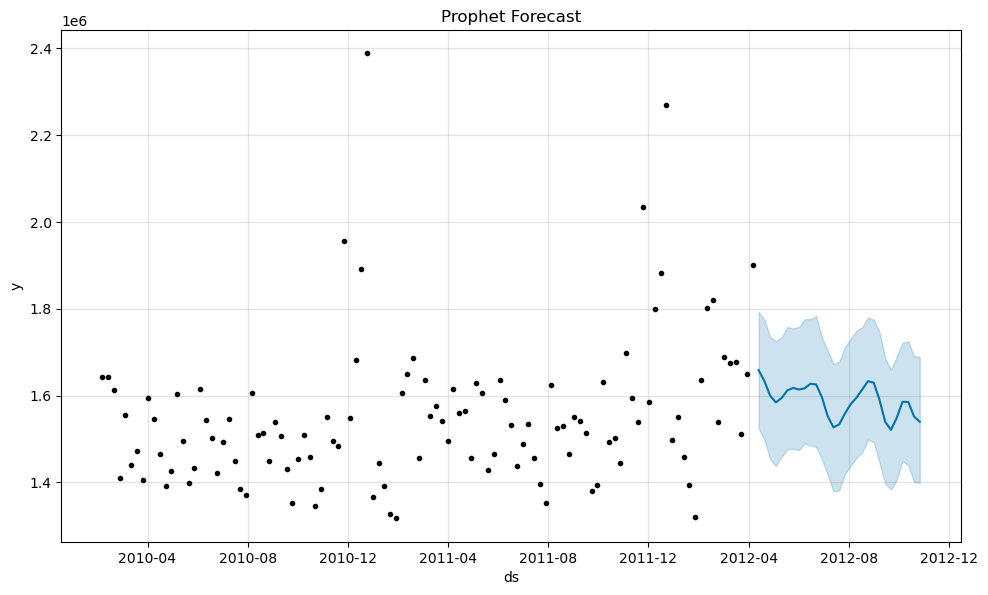

In [13]:
# Plot
fig = model.plot(forecast)
plt.title("Prophet Forecast")
plt.show()

In [15]:
# Evaluation
rmse = mean_squared_error(test_df["y"], forecast["yhat"], squared=False)
print("Prophet RMSE:", round(rmse, 2))

Prophet RMSE: 79146.37


C:\Users\ratho\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
